In [25]:
import graphviz
import glob
import hiddenlayer as hl
import torch
from model import D, G
import matplotlib.pyplot as plt
from glob import glob
from moviepy.editor import ImageSequenceClip
from IPython.display import HTML
from tqdm import tqdm
import warnings
with warnings.catch_warnings():
    warnings.simplefilter('ignore')

In [2]:
D

Discriminator(
  (conv1): Sequential(
    (0): Conv2d(3, 32, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
  )
  (conv2): Sequential(
    (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (conv3): Sequential(
    (0): Conv2d(32, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (conv4): Sequential(
    (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (conv5): Sequential(
    (0): Conv2d(64, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (conv6): Sequential(
    (0): Conv2d(128, 128, kernel_si

In [3]:
G

Generator(
  (fc): Linear(in_features=100, out_features=2048, bias=True)
  (deconv1): Sequential(
    (0): ConvTranspose2d(128, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (deconv2): Sequential(
    (0): ConvTranspose2d(64, 32, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (deconv3): Sequential(
    (0): ConvTranspose2d(32, 3, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (1): BatchNorm2d(3, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (deconv4_res): Sequential(
    (0): ConvTranspose2d(3, 3, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (1): BatchNorm2d(3, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (deconv5_res): Sequential(
    (0): ConvTranspose2d(3, 3, kernel_size=(1, 1), stride=

In [4]:
def build(architecture, initial_shape):
    hl_graph = hl.build_graph(architecture, initial_shape)
    hl_graph.theme = hl.graph.THEMES["blue"].copy()
    return hl_graph

In [6]:
generator = build(G, torch.zeros([1,100]))
discriminator = build(D, torch.zeros([16,3, 32,32]))

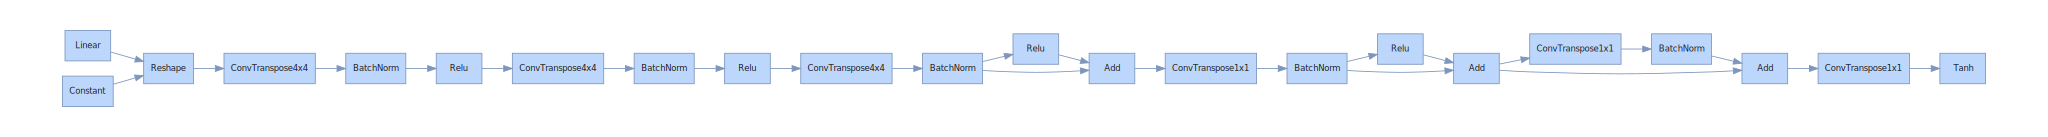

In [7]:
generator.save('assets/generator', 'png')
generator

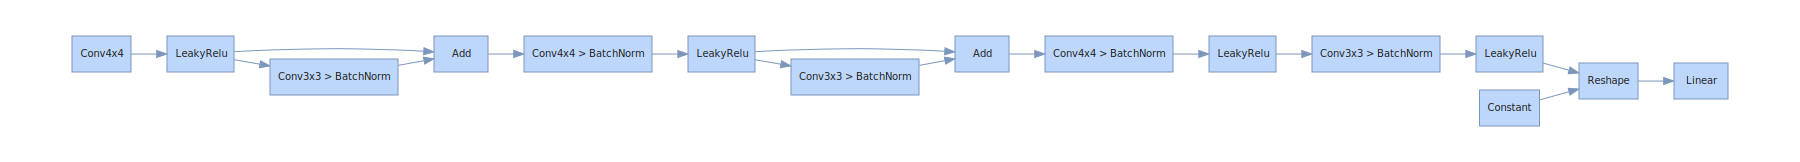

In [8]:
discriminator.save('assets/discriminator', 'png')
discriminator

In [4]:
G.load_state_dict(torch.load('weights/G.pth', map_location='cpu'))

<All keys matched successfully>

In [264]:
generate_images(100)

  1%|          | 1/100 [00:00<01:34,  1.05it/s]Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
  3%|▎         | 3/100 [00:01<01:06,  1.45it/s]Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
  6%|▌         | 6/100 [00:01<00:46,  2.01it/s]Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
  8%|▊         | 8/100 [00

Successfully saved 100 images to folder generated_samples


In [36]:
def create_gif(images='generated_samples', gif_name='/assets/loop.gif'):
    frames = []
    imgs = glob.glob(f"{images}/*.jpg")
    for i in imgs:
        new_frame = Image.open(i)
        frames.append(new_frame)

    frames[0].save(gif_name, format='GIF',
                   append_images=frames[1:],
                   save_all=True,
                   duration=200, loop=0)

In [37]:
create_gif()

In [24]:
HTML('<img src="assets/loop.gif">')